<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Lab #1: ES models </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Info</h1> 
This is first laboratory task for the course TSA.
The Lab is desinged to impove skills of tuning parameters of ES models and get experience of coding of simple Regression Models.

The Lab should take about 5-6 hours to be completed.

<h1 align="center">Important Info</h1> 
- <span style="font-size: 14pt;"> You must send your solution to the email </span> <span style="color:red; font-size: 12pt;">alexromsput@gmail.com, </span>
- The theme of your message must be <span style="color:red; font-size: 12pt;"> TSA-Erevan-2017-[Your Surname] </span>, for exmaple -- TSA-Erevan-2017-Romanenko,
- You can send ipnb file in attachment or just a link to github. The file in attachment of the letter must be named as <span style="color:red; font-size: 12pt;"> [Surname]-[Group]-Lab1.ipnb</span>, for example -- Romanenko-Evening-Lab1.ipnb,
  
<span style="color:red; font-size: 14pt;"> DEADLINE: 10 June 2017 23:59:59 </span>


<h1 align="center">1. Using ARIMA for wage and electricity comsumption datasets (50%)</h1>
Solve the task for Practice day 2.

<h1 align="center">2. Forecasting of real TS (50%)</h1>
Build the forecast for a dataset  according to the scheme in task 2 (in Practice day 2). You can find the link to dataset that you need to forecast at the sheet 'Lab2' <a href="https://drive.google.com/open?id=11-lzxxR0aeBmEDGEW1GiIaP4X3fyCTHxTg4b0wALpzs">here</a>. 
     


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa import stattools
from scipy import stats
from sklearn.grid_search import ParameterGrid

%matplotlib inline

In [2]:
def qualityMACAPE(x,y):
    qlt = np.abs(2*(x-y)/(x+y+1e-5)).replace([np.inf, -np.inf], np.nan)
    return qlt.mean()

In [3]:
ts = pd.read_csv('./data/monthly-riverflow-in-cms-current.csv', delimiter=',', decimal='.', parse_dates=True, index_col='Month')
ts.columns = ['riverflow']
ts.head()

,riverflow
Month,
1922-01-01,34.603
1922-02-01,83.761
1922-03-01,64.421
1922-04-01,38.539
1922-05-01,60.372


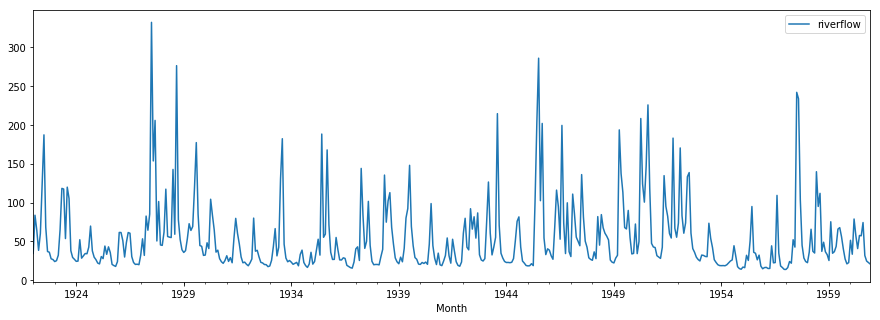

In [4]:
ts.plot(figsize=(15, 5))

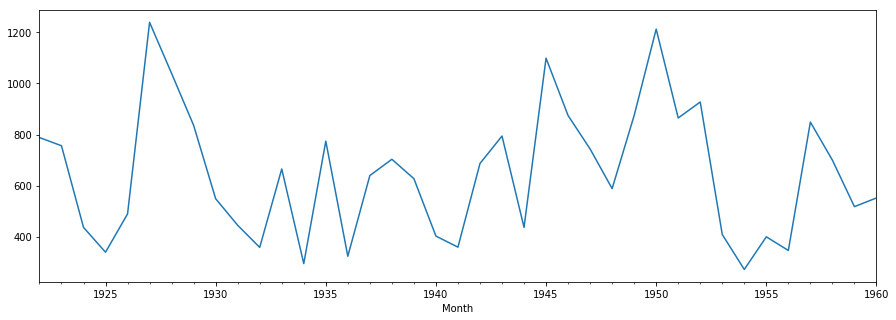

In [5]:
y_ts = ts['riverflow'].resample('A').sum()
y_ts.plot(figsize=(15, 5))

In [6]:
sm.stats.durbin_watson(y_ts)

0.18204087166040611

In [11]:
dta = y_ts[:'1947-12-31']

In [12]:
grid = ParameterGrid({'p': np.arange(0, 10, 1), 'q': np.arange(0, 10, 1)})
for param in grid:
    try:
        arma = sm.tsa.ARMA(dta, (param['p'], param['q'])).fit()
        print('p: %d, q: %d, aic: %f' % (param['p'], param['q'], arma.aic))
    except:
        print ('Cant fit')

p: 0, q: 0, aic: 364.424789
p: 0, q: 1, aic: 365.214926
p: 0, q: 2, aic: 366.872466
p: 0, q: 3, aic: 365.623114
p: 0, q: 4, aic: 366.796030


/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


p: 0, q: 5, aic: 368.768520
p: 0, q: 6, aic: 370.223727
p: 0, q: 7, aic: 371.705807
p: 0, q: 8, aic: 372.980585


/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p: 0, q: 9, aic: 371.861445
p: 1, q: 0, aic: 365.171754
p: 1, q: 1, aic: 367.144529
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
p: 2, q: 0, aic: 367.075704


/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p: 2, q: 1, aic: 369.479342
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
p: 3, q: 0, aic: 366.681694
p: 3, q: 1, aic: 368.638379
p: 3, q: 2, aic: nan


/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/tsa/tsatools.py:652: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/tsa/tsatools.py:654: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in subtract
  **kwargs)).imag/2./hess[i, j]
/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in multiply
  **kwargs)).imag/2./hess[i, j]
/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/tsa/tsatools.py:628: RuntimeWarning: invalid value encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/tsa/tsatoo

Cant fit
Cant fit


/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/tsa/tsatools.py:652: RuntimeWarning: divide by zero encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/tsa/tsatools.py:654: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/tsa/tsatools.py:654: RuntimeWarning: invalid value encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
p: 4, q: 0, aic: 368.659759
p: 4, q: 1, aic: 369.016111
p: 4, q: 2, aic: nan
Cant fit


/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p: 4, q: 4, aic: 374.637343
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
p: 5, q: 0, aic: 370.511471
p: 5, q: 1, aic: nan


/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p: 5, q: 2, aic: 372.601639
Cant fit
p: 5, q: 4, aic: nan
p: 5, q: 5, aic: nan
Cant fit
Cant fit
Cant fit
Cant fit
p: 6, q: 0, aic: 372.507624
p: 6, q: 1, aic: 372.580219
p: 6, q: 2, aic: nan
p: 6, q: 3, aic: nan
p: 6, q: 4, aic: nan
p: 6, q: 5, aic: nan
p: 6, q: 6, aic: nan
Cant fit
Cant fit
Cant fit
p: 7, q: 0, aic: 374.362073
Cant fit
p: 7, q: 2, aic: nan


/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p: 7, q: 3, aic: 378.967161
p: 7, q: 4, aic: nan
p: 7, q: 5, aic: nan
Cant fit


/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/tsa/tsatools.py:654: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


p: 7, q: 7, aic: nan
Cant fit
Cant fit
p: 8, q: 0, aic: 375.970768
p: 8, q: 1, aic: nan
p: 8, q: 2, aic: nan
Cant fit
Cant fit
p: 8, q: 5, aic: nan
p: 8, q: 6, aic: nan
p: 8, q: 7, aic: nan
Cant fit
Cant fit
p: 9, q: 0, aic: 375.373937
p: 9, q: 1, aic: nan


/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in add
  **kwargs)).imag/2./hess[i, j]


p: 9, q: 2, aic: nan
p: 9, q: 3, aic: nan
p: 9, q: 4, aic: nan
p: 9, q: 5, aic: nan
Cant fit
Cant fit
Cant fit
Cant fit


In [13]:
arma = sm.tsa.ARMA(dta, (1, 0)).fit()

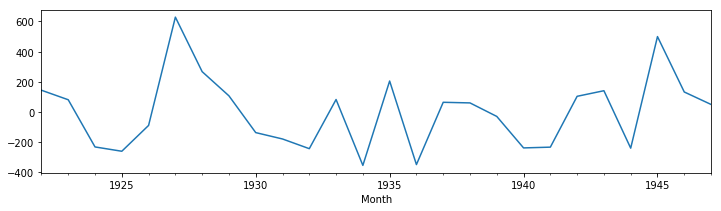

In [14]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
ax = arma.resid.plot(ax=ax)

In [15]:
sm.stats.durbin_watson(arma.resid.values)

1.9468555931370528

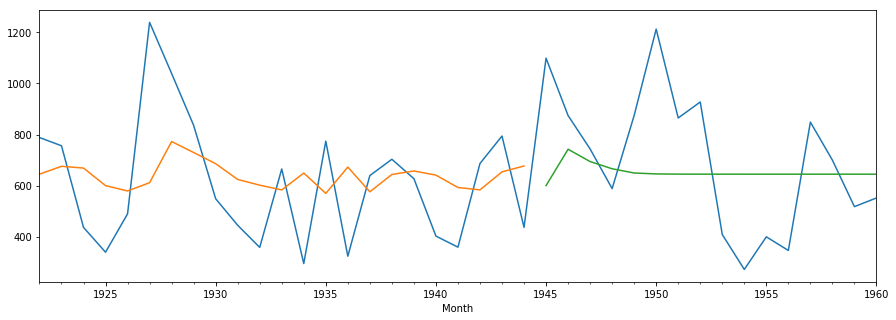

In [16]:
y_ts.dropna().plot(figsize=(15, 5))
arma.predict(end='1944-12-31').plot()
res = arma.predict(start='1945-12-31', end='1960-12-31')
res.plot(label='predicted')

In [17]:
qualityMACAPE(res, y_ts)

0.34798014517602782